<a href="https://colab.research.google.com/github/Yassinebo54/ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Project

## Pre-processing the dataset


### Upload file:

In [57]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('green_tripdata_2019-05.csv')
print(df.head())

                              Vendor lpep pickup datetime  \
0  Creative Mobile Technologies, LLC  2019-05-01 00:48:55   
1                      VeriFone Inc.  2019-05-01 00:53:04   
2                      VeriFone Inc.  2019-05-01 00:34:24   
3  Creative Mobile Technologies, LLC  2019-05-01 00:42:50   
4  Creative Mobile Technologies, LLC  2019-05-01 00:12:53   

  lpep dropoff datetime store and fwd flag      Rate type  \
0   2019-05-01 00:55:07                  N  Standard rate   
1   2019-05-01 01:09:10                  N  Standard rate   
2   2019-05-01 00:46:36                  N  Standard rate   
3   2019-05-01 00:49:20                  N  Standard rate   
4   2019-05-01 00:16:03                  N  Standard rate   

                PU Location                         DO Location  \
0  Manhattan,Central Harlem      Manhattan,Central Harlem North   
1      Brooklyn,Boerum Hill  Brooklyn,Prospect-Lefferts Gardens   
2   Brooklyn,Bushwick South                    Queens,Ridgewood  

In [4]:
print(df.describe(include=['object']))

               Vendor lpep pickup datetime lpep dropoff datetime  \
count          109094               109094                109094   
unique              2                93276                 93275   
top     VeriFone Inc.  2019-05-24 11:56:00   2019-05-18 00:00:00   
freq            92873                   10                    14   

       store and fwd flag      Rate type                  PU Location  \
count               98192         109094                       109094   
unique                  2              7                          227   
top                     N  Standard rate  Manhattan,East Harlem North   
freq                97938          95944                         8258   

                        DO Location payment type    trip type  
count                        109094       105994       109094  
unique                          255            6            3  
top     Manhattan,East Harlem North  Credit card  Street-hail  
freq                           4168  

In [34]:

print(df.duplicated().sum())


1


In [33]:

print(df.isnull().sum())
print("Original shape:", df.shape)

Vendor                        0
lpep pickup datetime          0
lpep dropoff datetime         0
store and fwd flag        10902
Rate type                     0
PU Location                   0
DO Location                   0
passenger count           11105
trip distance                 0
fare amount                   0
extra                     57569
mta tax                       0
tip amount                    0
tolls amount                  0
ehail fee                109052
improvement surcharge         0
total amount                  0
payment type               3100
trip type                     0
congestion surcharge      10902
dtype: int64
Original shape: (109094, 20)


In [38]:
print(df.columns)

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')


### Pre-processing:

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('green_tripdata_2019-05.csv')
df = df.drop(['Vendor', 'payment type','store and fwd flag', 'lpep pickup datetime', 'lpep dropoff datetime','Rate type', 'PU Location', 'DO Location',
       'passenger count','trip type','congestion surcharge','improvement surcharge' ], axis=1)
df['extra'] = df['extra'].fillna(0)
df['ehail fee'] = df['ehail fee'].fillna(0)
print(df.isnull().sum())
print("Original shape:", df.shape)
print(df.columns)


trip distance    0
fare amount      0
extra            0
mta tax          0
tip amount       0
tolls amount     0
ehail fee        0
total amount     0
dtype: int64
Original shape: (109094, 8)
Index(['trip distance', 'fare amount', 'extra', 'mta tax', 'tip amount',
       'tolls amount', 'ehail fee', 'total amount'],
      dtype='object')


In [69]:
df = pd.read_csv('green_tripdata_2019-05.csv')
# Drop irrelevant columns
df = df.drop(['Vendor', 'payment type', 'store and fwd flag', 'lpep pickup datetime',
              'lpep dropoff datetime', 'PU Location', 'DO Location', 'passenger count',
              'trip type', 'congestion surcharge', 'improvement surcharge','Rate type'], axis=1)

# Handle missing values for known columns
df['extra'] = df['extra'].fillna(0)
df['ehail fee'] = df['ehail fee'].fillna(0)

# Ensure there are no NaNs in the 'total amount' column before categorization
df = df.dropna(subset=['total amount'])

# Discretize trip price into categories using the total amount
bins = [0, 10, 30, float('inf')]  # Adjust bins based on data distribution
labels = ['low', 'medium', 'high']
df['price_category'] = pd.cut(df['total amount'], bins=bins, labels=labels)

# Drop the original total amount column to avoid data leakage
df = df.drop('total amount', axis=1)

# Define features and target variable
X = df.drop('price_category', axis=1)
y = df['price_category']

# Convert all columns in X to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check columns with NaNs
nan_columns = X.columns[X.isnull().any()]
print("Columns with NaNs and their count:")
print(X[nan_columns].isnull().sum())

# Fill remaining NaNs with column median for numerical and mode for categorical
for column in nan_columns:
    if X[column].dtype == 'object':
        X[column] = X[column].fillna(X[column].mode()[0])
    else:
        X[column] = X[column].fillna(X[column].median())

# Check for any remaining NaN values in X
print("Number of NaNs in X after additional filling:", X.isnull().sum().sum())

# Convert X and y to numpy arrays
X_array = X.values
y_numeric = y.cat.codes

# Check for NaN values in y_numeric
print("Number of NaNs in y_numeric:", np.isnan(y_numeric).sum())

# Remove any rows with NaN values in y_numeric
X_array = X_array[~np.isnan(y_numeric)]
y_array = y_numeric[~np.isnan(y_numeric)]

# Check the shape of X and y
print("Shape of X after filling and removing NaNs:", X_array.shape)
print("Shape of y after removing NaNs:", y_array.shape)

Columns with NaNs and their count:
Series([], dtype: float64)
Number of NaNs in X after additional filling: 0
Number of NaNs in y_numeric: 0
Shape of X after filling and removing NaNs: (109094, 7)
Shape of y after removing NaNs: (109094,)


In [70]:
print(X.head())

   trip distance  fare amount  extra  mta tax  tip amount  tolls amount  \
0           1.50          7.5    0.0      0.5         0.0           0.0   
1           3.56         14.5    0.5      0.5         4.2           0.0   
2           2.23         10.0    0.5      0.5         0.0           0.0   
3           1.70          7.5    0.5      0.5         1.0           0.0   
4           0.60          4.5    0.5      0.5         1.7           0.0   

   ehail fee  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42, stratify=y_array)

### Check the dataset after pre-processing:


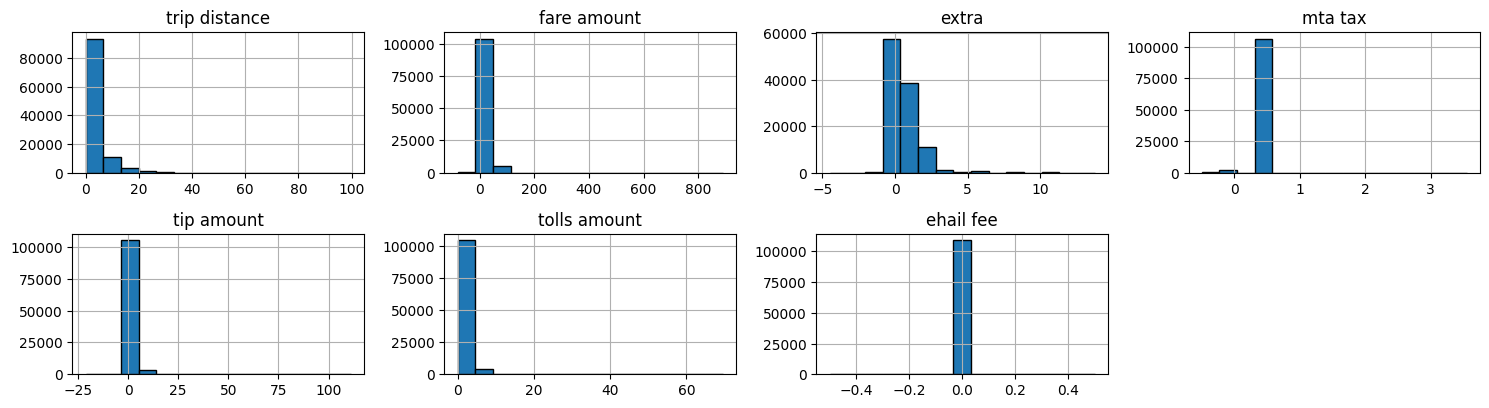

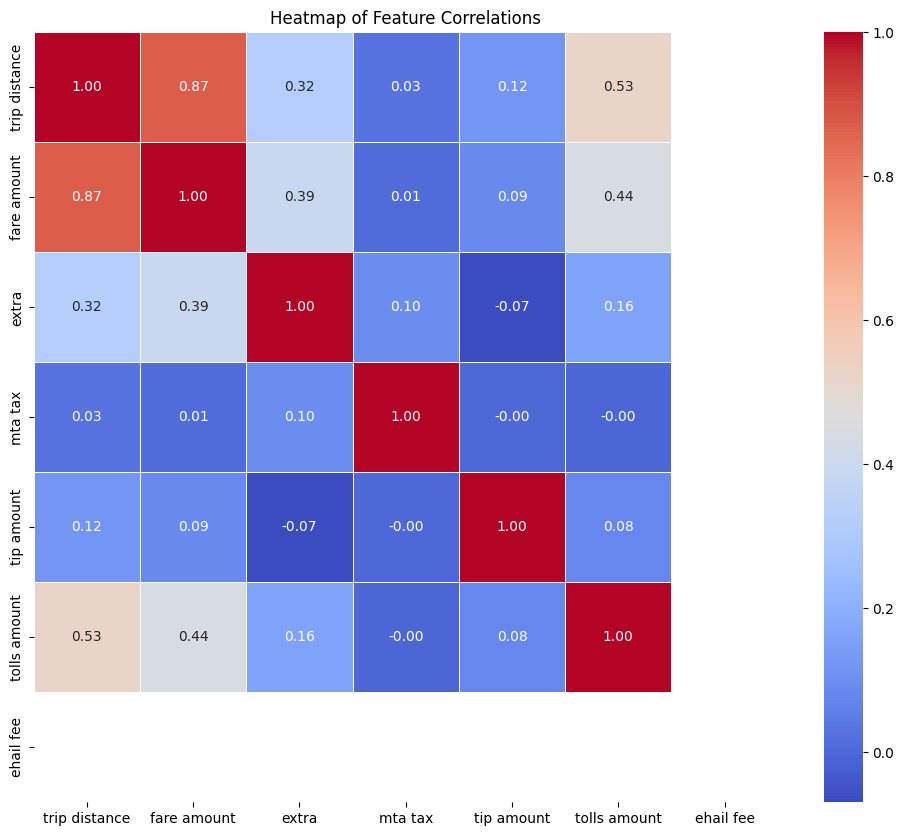

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_features_histogram(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(5, 4), edgecolor='black')
    plt.tight_layout()
    plt.show()
plot_numerical_features_histogram(df)
def plot_heatmap(df):
    plt.figure(figsize=(12, 10))
    # Exclude 'price_category' when calculating the correlation matrix
    correlation_matrix = df.drop('price_category', axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap of Feature Correlations')
    plt.show()

# Plot heatmap of feature correlations
plot_heatmap(df)






### Split dataset into training and real:

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42, stratify=y_array)

## Diagonistics per Classifier

### General Function:

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, validation_curve, train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classifier(clf, X_train, X_test, y_train, y_test, X_array, y_array):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the test set
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Perform cross-validation
    skf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    cv_scores = cross_val_score(clf, X_array, y_array, cv=skf, n_jobs=-1)
    # Generate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)

    return {
        'accuracy': accuracy,
        'cv_scores': cv_scores,
        'mean_cv_score': np.mean(cv_scores),
        'confusion_matrix': cm,
        'classification_report': cr,
        'y_pred': y_pred  # Add predictions to the result
    }

def plot_learning_curve(clf, X_array, y_array, title):
    train_sizes, train_scores, test_scores = learning_curve(clf, X_array, y_array, cv=3, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 5), scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.title(f"Learning Curve for {title}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

def plot_validation_curve(clf, X_array, y_array, param_name, param_range, title):
    train_scores, test_scores = validation_curve(clf, X_array, y_array, param_name=param_name, param_range=param_range, cv=3, scoring="accuracy", n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
    plt.title(f"Validation Curve for {title}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

def plot_tsne(X, y, title, sample_size=2000):
    # Sample the data to speed up t-SNE
    if len(X) > sample_size:
        indices = np.random.choice(len(X), sample_size, replace=False)
        X = X[indices]
        y = y[indices]
    tsne = TSNE(n_components=2, random_state=42, n_iter=200)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="deep", legend="full")
    plt.title(title)
    plt.show()


### KNN


KNN Classifier
Accuracy: 0.9856547046152436
Mean CV Score: 0.9850220962477115
Confusion Matrix:
[[  102     1     0     0]
 [    3  7280    24     0]
 [    0   179 10557    39]
 [    0     0    67  3567]]
Classification Report:
              precision    recall  f1-score       support
-1             0.971429  0.990291  0.980769    103.000000
0              0.975871  0.996305  0.985982   7307.000000
1              0.991454  0.979768  0.985576  10775.000000
2              0.989185  0.981563  0.985359   3634.000000
accuracy       0.985655  0.985655  0.985655      0.985655
macro avg      0.981985  0.986982  0.984422  21819.000000
weighted avg   0.985763  0.985655  0.985653  21819.000000


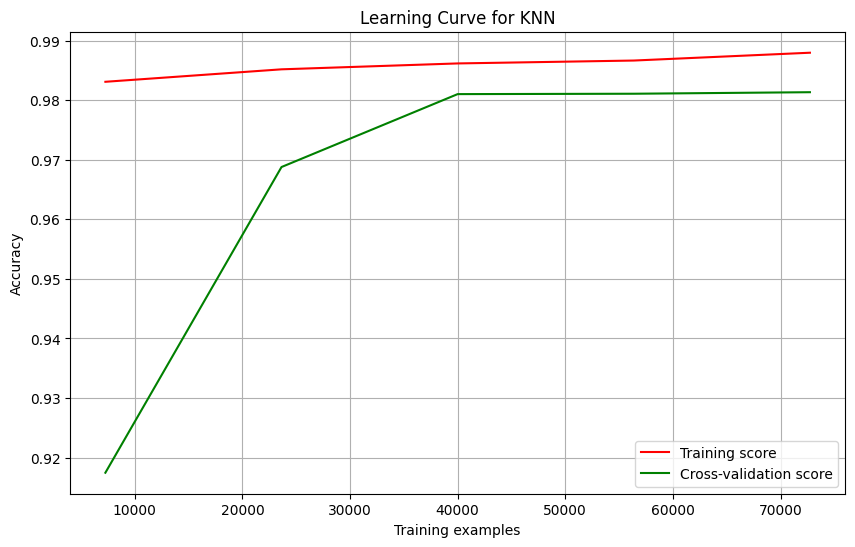

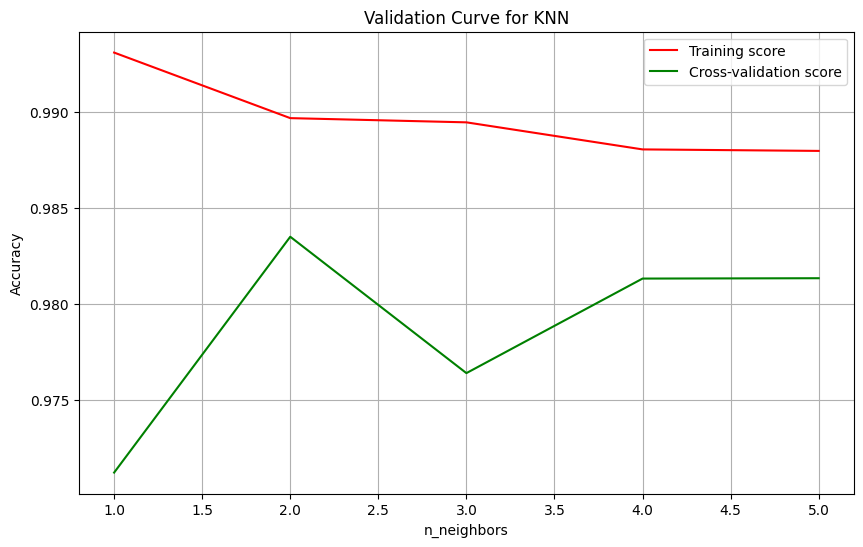

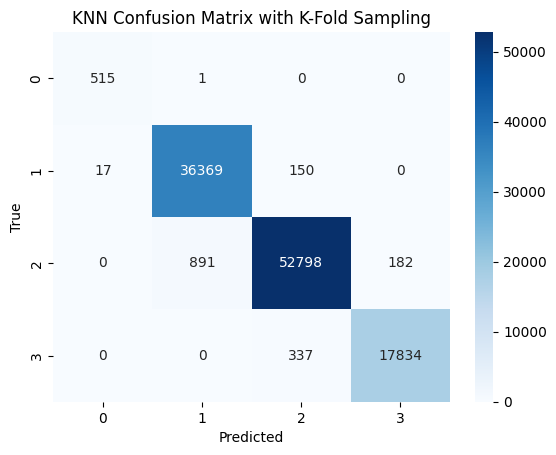

In [84]:
# KNN Classifier
clf_knn = KNeighborsClassifier()
results_knn = evaluate_classifier(clf_knn, X_train, X_test, y_train, y_test, X_array, y_array)

print("\nKNN Classifier")
print(f"Accuracy: {results_knn['accuracy']}")
print(f"Mean CV Score: {results_knn['mean_cv_score']}")
print(f"Confusion Matrix:\n{results_knn['confusion_matrix']}")
print(f"Classification Report:\n{pd.DataFrame(results_knn['classification_report']).transpose()}")

plot_learning_curve(clf_knn, X_array, y_array, "KNN")
plot_validation_curve(clf_knn, X_array, y_array, "n_neighbors", range(1, 6), "KNN")

# Generate confusion matrix for k-fold sampling
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_kf = cross_val_predict(clf_knn, X_array, y_array, cv=kf)
cm_kf = confusion_matrix(y_array, y_pred_kf)
sns.heatmap(cm_kf, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix with K-Fold Sampling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot t-SNE with classified data
#plot_tsne(X_array, results_knn['y_pred'], "t-SNE visualization of KNN classified data")


### Naive Bayes Classifier


Naive Bayes Classifier
Accuracy: 0.8620468399101701
Mean CV Score: 0.8653454855524317
Confusion Matrix:
[[ 100    0    0    3]
 [ 121 7143   39    4]
 [ 170 2100 8247  258]
 [  32    0  283 3319]]
Classification Report:
              precision    recall  f1-score       support
-1             0.236407  0.970874  0.380228    103.000000
0              0.772801  0.977556  0.863202   7307.000000
1              0.962423  0.765383  0.852667  10775.000000
2              0.926060  0.913319  0.919645   3634.000000
accuracy       0.862047  0.862047  0.862047      0.862047
macro avg      0.724423  0.906783  0.753936  21819.000000
weighted avg   0.889436  0.862047  0.865121  21819.000000


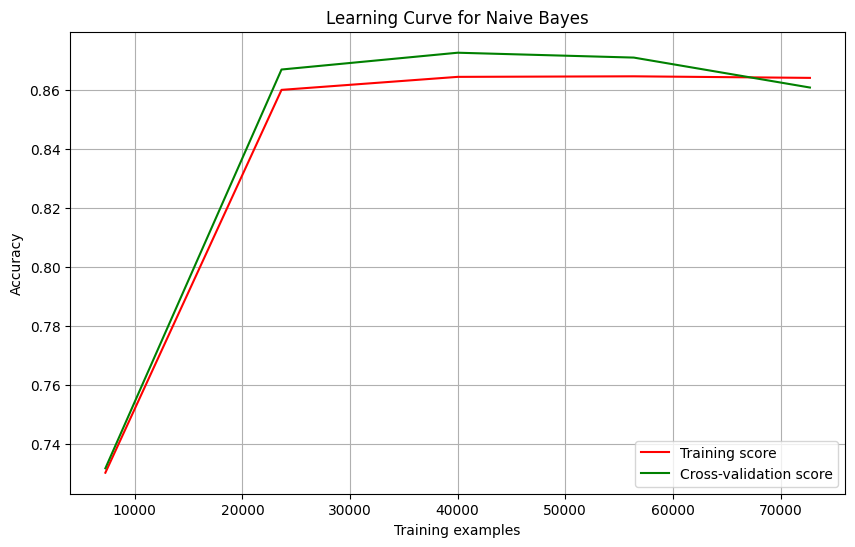

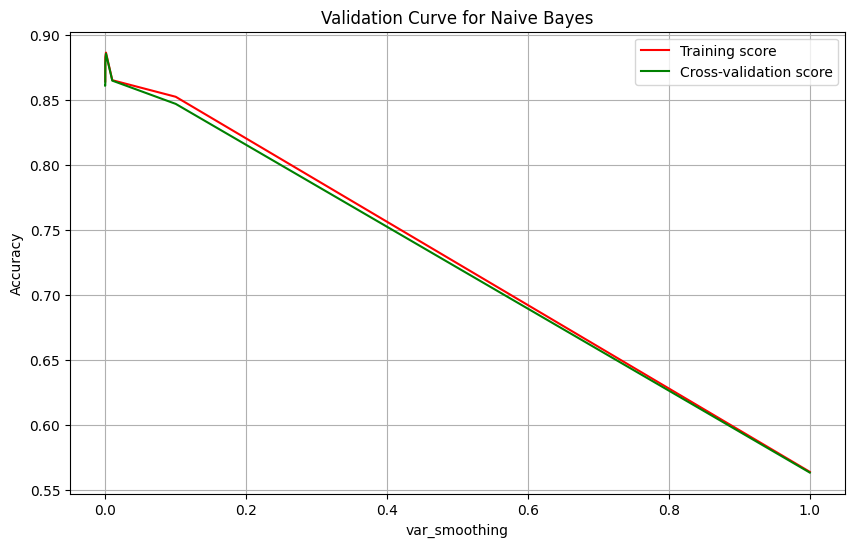

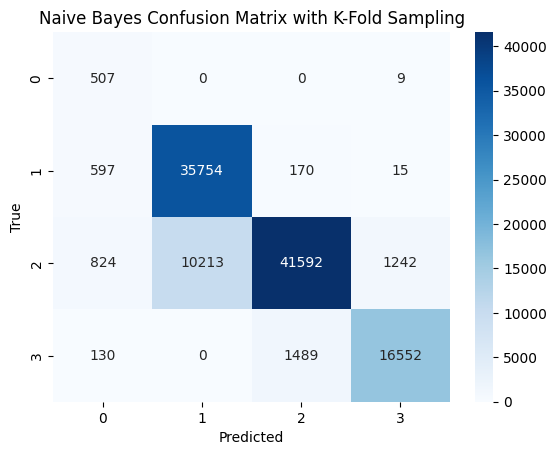

In [85]:
# Naive Bayes Classifier
clf_nb = GaussianNB()
results_nb = evaluate_classifier(clf_nb, X_train, X_test, y_train, y_test, X_array, y_array)

print("\nNaive Bayes Classifier")
print(f"Accuracy: {results_nb['accuracy']}")
print(f"Mean CV Score: {results_nb['mean_cv_score']}")
print(f"Confusion Matrix:\n{results_nb['confusion_matrix']}")
print(f"Classification Report:\n{pd.DataFrame(results_nb['classification_report']).transpose()}")

plot_learning_curve(clf_nb, X_array, y_array, "Naive Bayes")

# Validation curve for Naive Bayes based on var_smoothing parameter
param_range_nb = np.logspace(0, -9, 10)
plot_validation_curve(clf_nb, X_array, y_array, "var_smoothing", param_range_nb, "Naive Bayes")

# Generate confusion matrix for k-fold sampling
y_pred_kf = cross_val_predict(clf_nb, X_array, y_array, cv=kf)
cm_kf = confusion_matrix(y_array, y_pred_kf)
sns.heatmap(cm_kf, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix with K-Fold Sampling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#plot_tsne(X_array, results_nb['y_pred'], "t-SNE visualization of Naive Bayes classified data")


### Logistic Regression Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classifier
Accuracy: 0.9753425913194922
Mean CV Score: 0.9757365251637369
Confusion Matrix:
[[  103     0     0     0]
 [    5  7130   172     0]
 [    0   197 10512    66]
 [    0     0    98  3536]]
Classification Report:
              precision    recall  f1-score       support
-1             0.953704  1.000000  0.976303    103.000000
0              0.973113  0.975777  0.974443   7307.000000
1              0.974958  0.975592  0.975275  10775.000000
2              0.981677  0.973032  0.977336   3634.000000
accuracy       0.975343  0.975343  0.975343      0.975343
macro avg      0.970863  0.981100  0.975839  21819.000000
weighted avg   0.975359  0.975343  0.975344  21819.000000


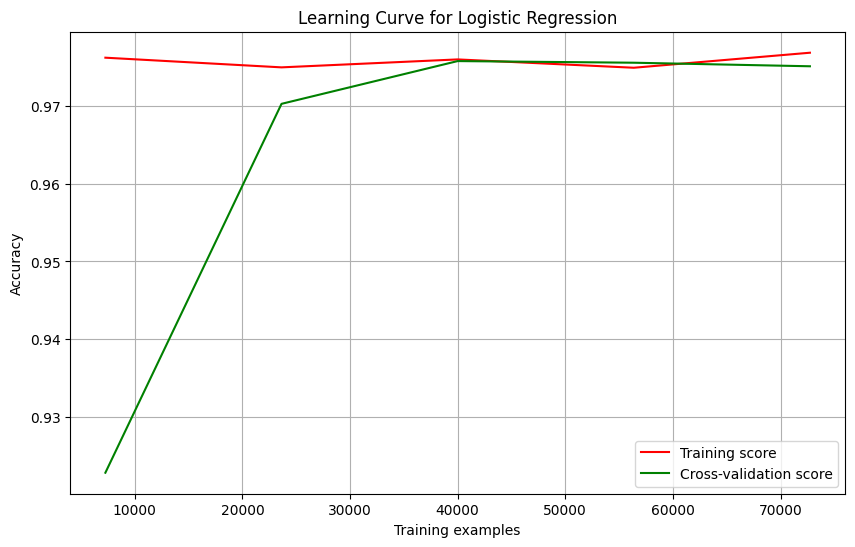

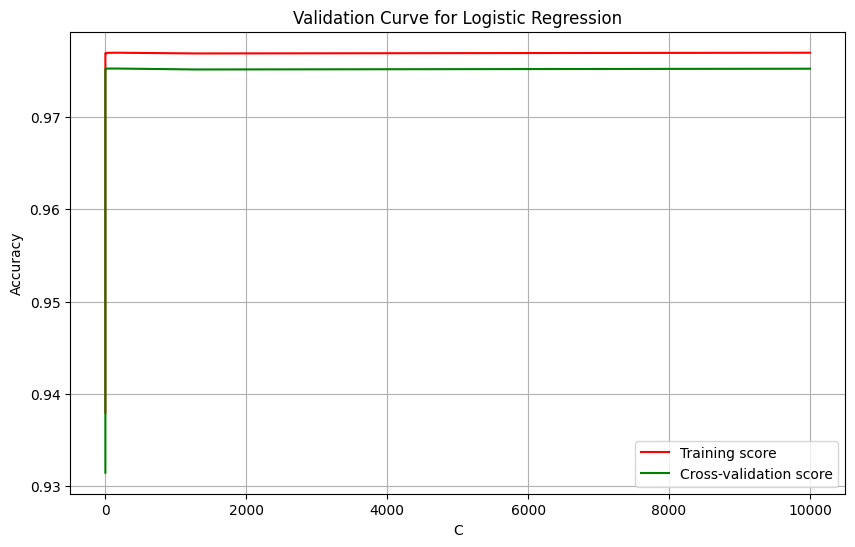

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

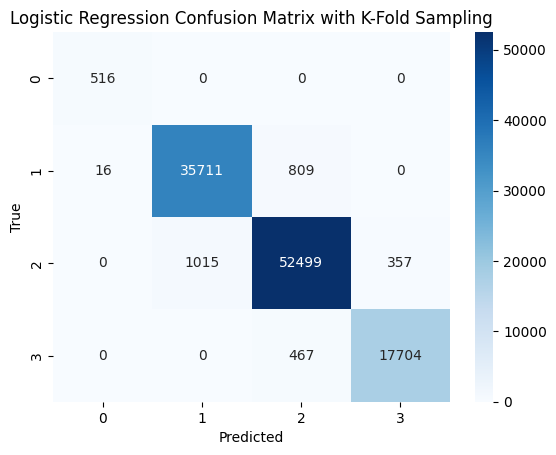

In [92]:

clf_lr = LogisticRegression(max_iter=1000, C=1.0)  # C is the inverse of regularization strength
results_lr = evaluate_classifier(clf_lr, X_train, X_test, y_train, y_test, X_array, y_array)

print("\nLogistic Regression Classifier")
print(f"Accuracy: {results_lr['accuracy']}")
print(f"Mean CV Score: {results_lr['mean_cv_score']}")
print(f"Confusion Matrix:\n{results_lr['confusion_matrix']}")
print(f"Classification Report:\n{pd.DataFrame(results_lr['classification_report']).transpose()}")

plot_learning_curve(clf_lr, X_array, y_array, "Logistic Regression")
plot_validation_curve(clf_lr, X_array, y_array, "C", np.logspace(-4, 4, 10), "Logistic Regression")

# Generate confusion matrix for k-fold sampling
y_pred_kf = cross_val_predict(clf_lr, X_array, y_array, cv=kf)
cm_kf = confusion_matrix(y_array, y_pred_kf)
sns.heatmap(cm_kf, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix with K-Fold Sampling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot t-SNE with classified data
#plot_tsne(X_array, results_lr['y_pred'], "t-SNE visualization of Logistic Regression classified data")


### Decision Tree Classifier


Decision Tree Classifier
Accuracy: 0.9751592648609011
Mean CV Score: 0.9740040727371269
Confusion Matrix:
[[  103     0     0     0]
 [    0  7258    49     0]
 [    0   367 10386    22]
 [    0     0   104  3530]]
Classification Report:
              precision    recall  f1-score       support
-1             1.000000  1.000000  1.000000    103.000000
0              0.951869  0.993294  0.972140   7307.000000
1              0.985482  0.963898  0.974571  10775.000000
2              0.993806  0.971381  0.982466   3634.000000
accuracy       0.975159  0.975159  0.975159      0.975159
macro avg      0.982789  0.982143  0.982294  21819.000000
weighted avg   0.975680  0.975159  0.975192  21819.000000


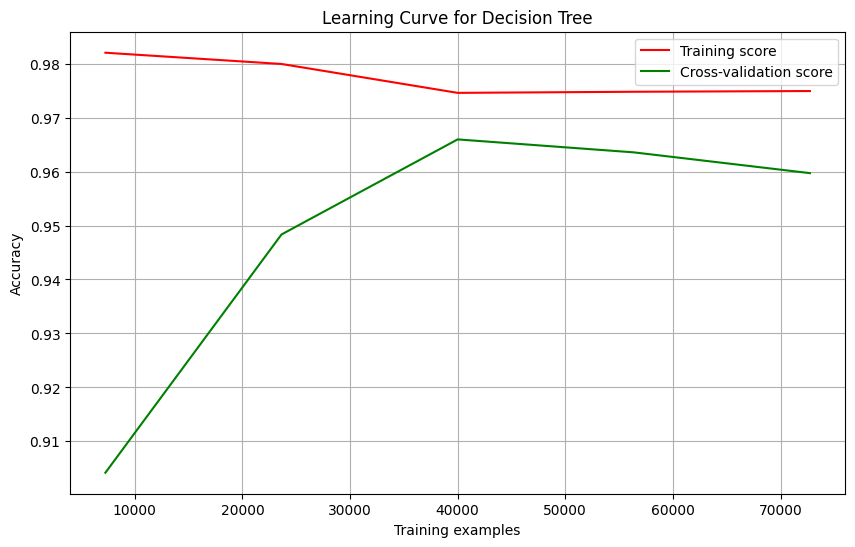

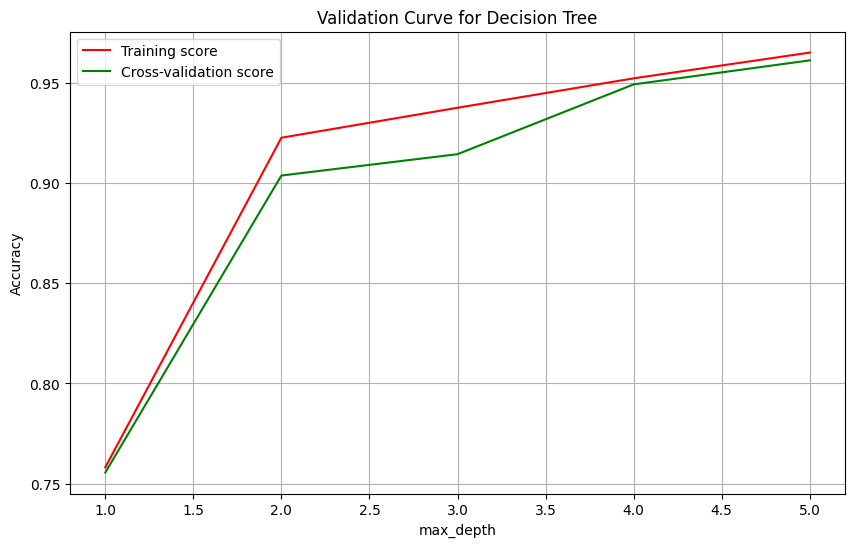

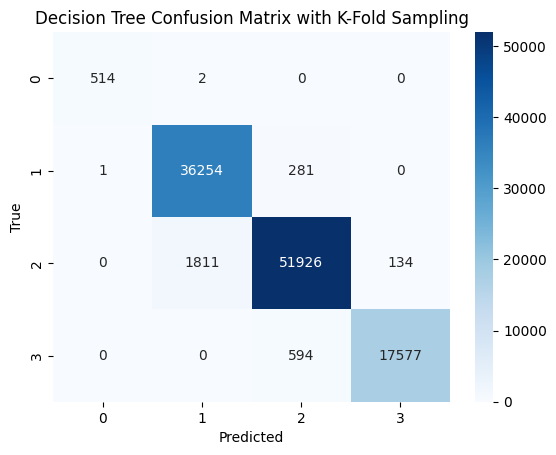

In [91]:

clf_dt = DecisionTreeClassifier(random_state=42, max_depth=6)  # Adjust max_depth for regularization
results_dt = evaluate_classifier(clf_dt, X_train, X_test, y_train, y_test, X_array, y_array)

print("\nDecision Tree Classifier")
print(f"Accuracy: {results_dt['accuracy']}")
print(f"Mean CV Score: {results_dt['mean_cv_score']}")
print(f"Confusion Matrix:\n{results_dt['confusion_matrix']}")
print(f"Classification Report:\n{pd.DataFrame(results_dt['classification_report']).transpose()}")

plot_learning_curve(clf_dt, X_array, y_array, "Decision Tree")
plot_validation_curve(clf_dt, X_array, y_array, "max_depth", range(1, 6), "Decision Tree")

# Generate confusion matrix for k-fold sampling
y_pred_kf = cross_val_predict(clf_dt, X_array, y_array, cv=kf)
cm_kf = confusion_matrix(y_array, y_pred_kf)
sns.heatmap(cm_kf, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix with K-Fold Sampling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#plot_tsne(X_array, results_dt['y_pred'], "t-SNE visualization of Decision Tree classified data")


### Random Forest Classifier


Random Forest Classifier
Accuracy: 0.964984646409093
Mean CV Score: 0.9643976606890515
Confusion Matrix:
[[  101     1     1     0]
 [    0  6962   345     0]
 [    0   252 10483    40]
 [    0     0   125  3509]]
Classification Report:
              precision    recall  f1-score       support
-1             1.000000  0.980583  0.990196    103.000000
0              0.964934  0.952785  0.958821   7307.000000
1              0.957002  0.972900  0.964886  10775.000000
2              0.988729  0.965603  0.977029   3634.000000
accuracy       0.964985  0.964985  0.964985      0.964985
macro avg      0.977666  0.967968  0.972733  21819.000000
weighted avg   0.965146  0.964985  0.964997  21819.000000


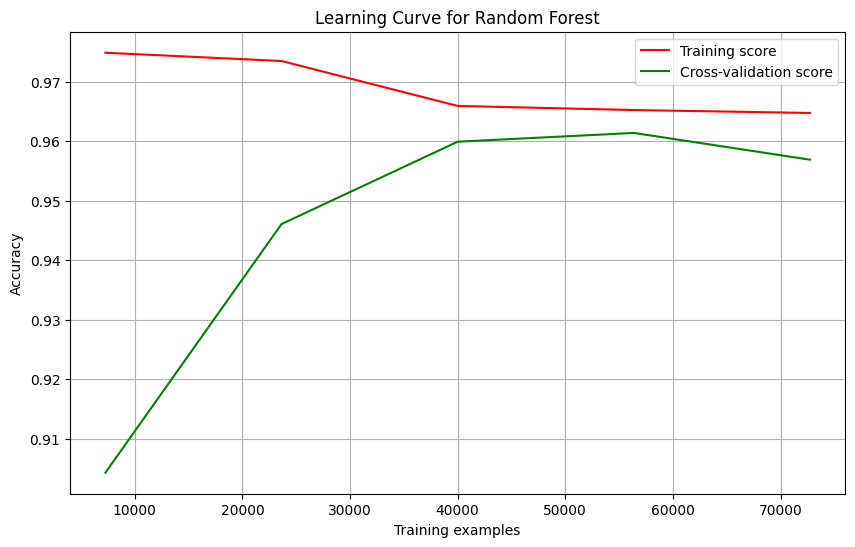

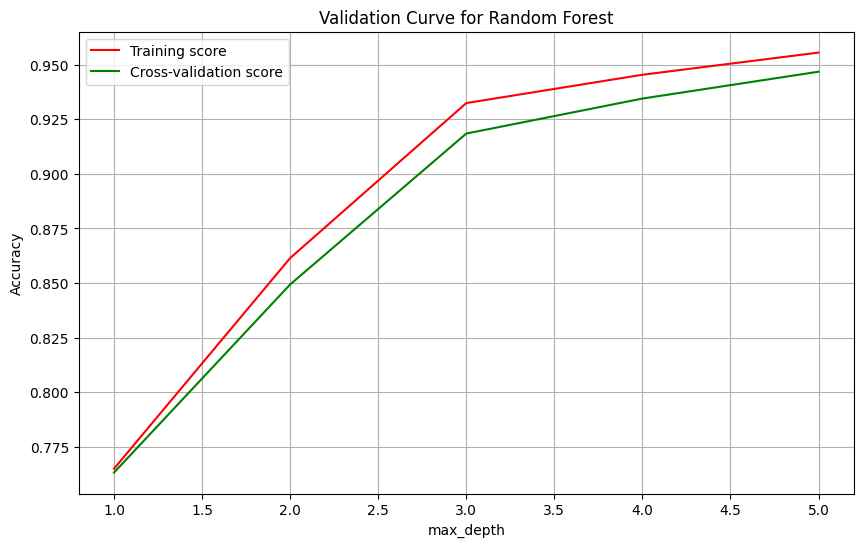

In [ ]:
clf_rf = RandomForestClassifier(random_state=42, max_depth=6, n_estimators=100)  # Adjust max_depth for regularization and n_estimators
results_rf = evaluate_classifier(clf_rf, X_train, X_test, y_train, y_test, X_array, y_array)

print("\nRandom Forest Classifier")
print(f"Accuracy: {results_rf['accuracy']}")
print(f"Mean CV Score: {results_rf['mean_cv_score']}")
print(f"Confusion Matrix:\n{results_rf['confusion_matrix']}")
print(f"Classification Report:\n{pd.DataFrame(results_rf['classification_report']).transpose()}")

plot_learning_curve(clf_rf, X_array, y_array, "Random Forest")
plot_validation_curve(clf_rf, X_array, y_array, "max_depth", range(1, 6), "Random Forest")

# Generate confusion matrix for k-fold sampling
y_pred_kf = cross_val_predict(clf_rf, X_array, y_array, cv=kf)
cm_kf = confusion_matrix(y_array, y_pred_kf)
sns.heatmap(cm_kf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix with K-Fold Sampling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#plot_tsne(X_array, results_rf['y_pred'], "t-SNE visualization of Random Forest classified data")


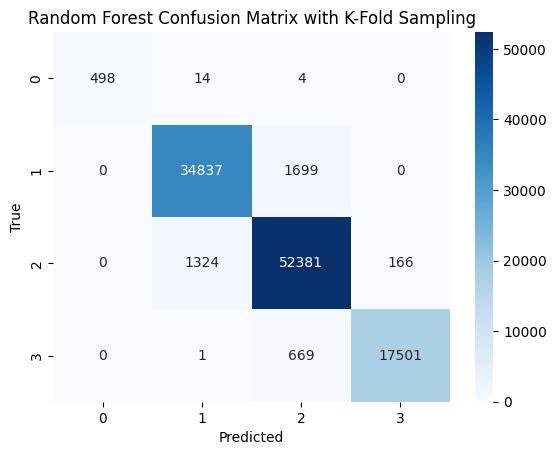

In [90]:
# Generate confusion matrix for k-fold sampling
y_pred_kf = cross_val_predict(clf_rf, X_array, y_array, cv=kf)
cm_kf = confusion_matrix(y_array, y_pred_kf)
sns.heatmap(cm_kf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix with K-Fold Sampling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Compare between different classifiers:

            Classifier  Accuracy  Mean CV Score
0                  KNN  0.985655       0.985022
1          Naive Bayes  0.862047       0.865345
2  Logistic Regression  0.975343       0.975737
3        Decision Tree  0.975159       0.974004
4        Random Forest  0.964985       0.964398


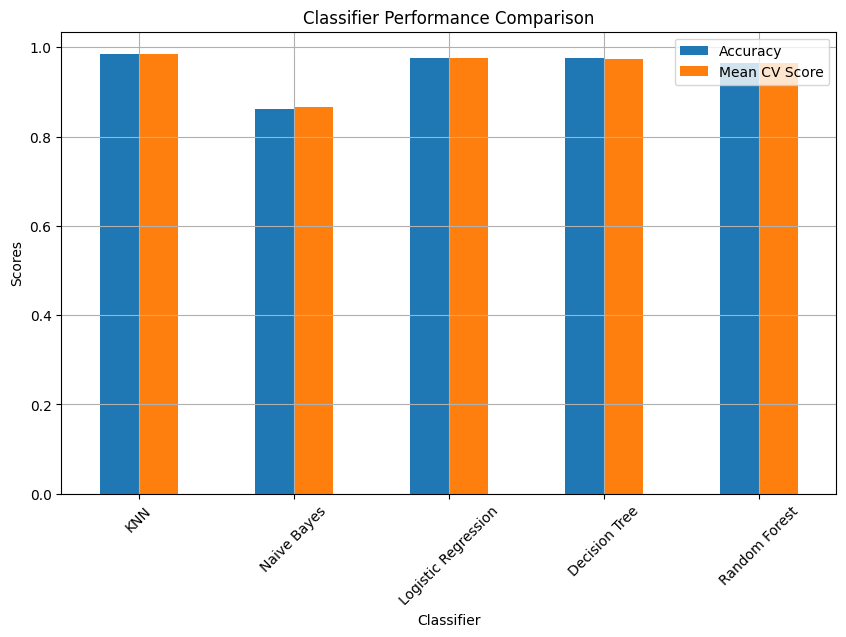

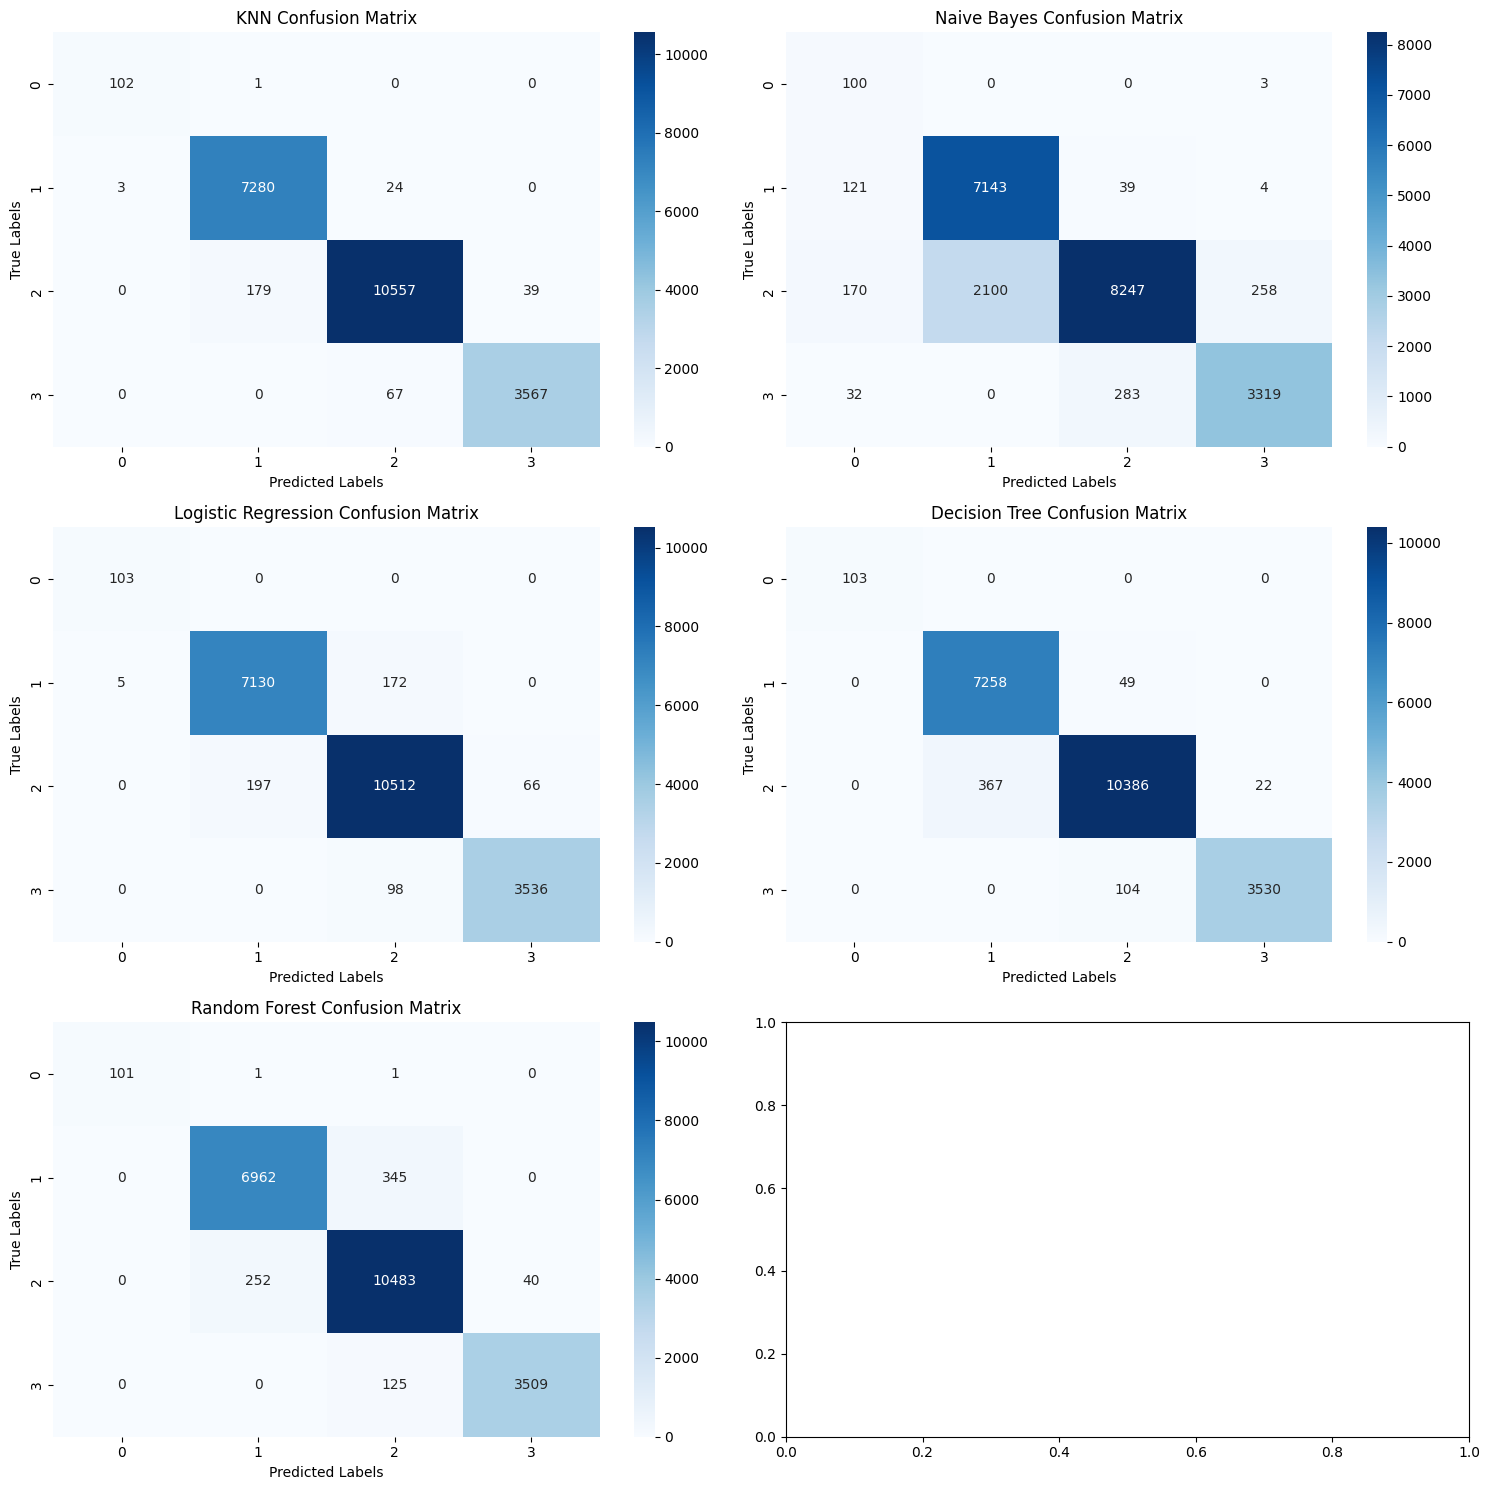

In [93]:
# Print comparison results
comparison_df = pd.DataFrame({
    'Classifier': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [results_knn['accuracy'], results_nb['accuracy'], results_lr['accuracy'], results_dt['accuracy'], results_rf['accuracy']],
    'Mean CV Score': [results_knn['mean_cv_score'], results_nb['mean_cv_score'], results_lr['mean_cv_score'], results_dt['mean_cv_score'], results_rf['mean_cv_score']]
})
print(comparison_df)

# Plot comparison results
comparison_df.set_index('Classifier', inplace=True)
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classifier Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for idx, (name, result) in enumerate([('KNN', results_knn), ('Naive Bayes', results_nb), ('Logistic Regression', results_lr), ('Decision Tree', results_dt), ('Random Forest', results_rf)]):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel('Predicted Labels')
    axes[idx].set_ylabel('True Labels')
plt.tight_layout()
plt.show()



### Classification comparsion:

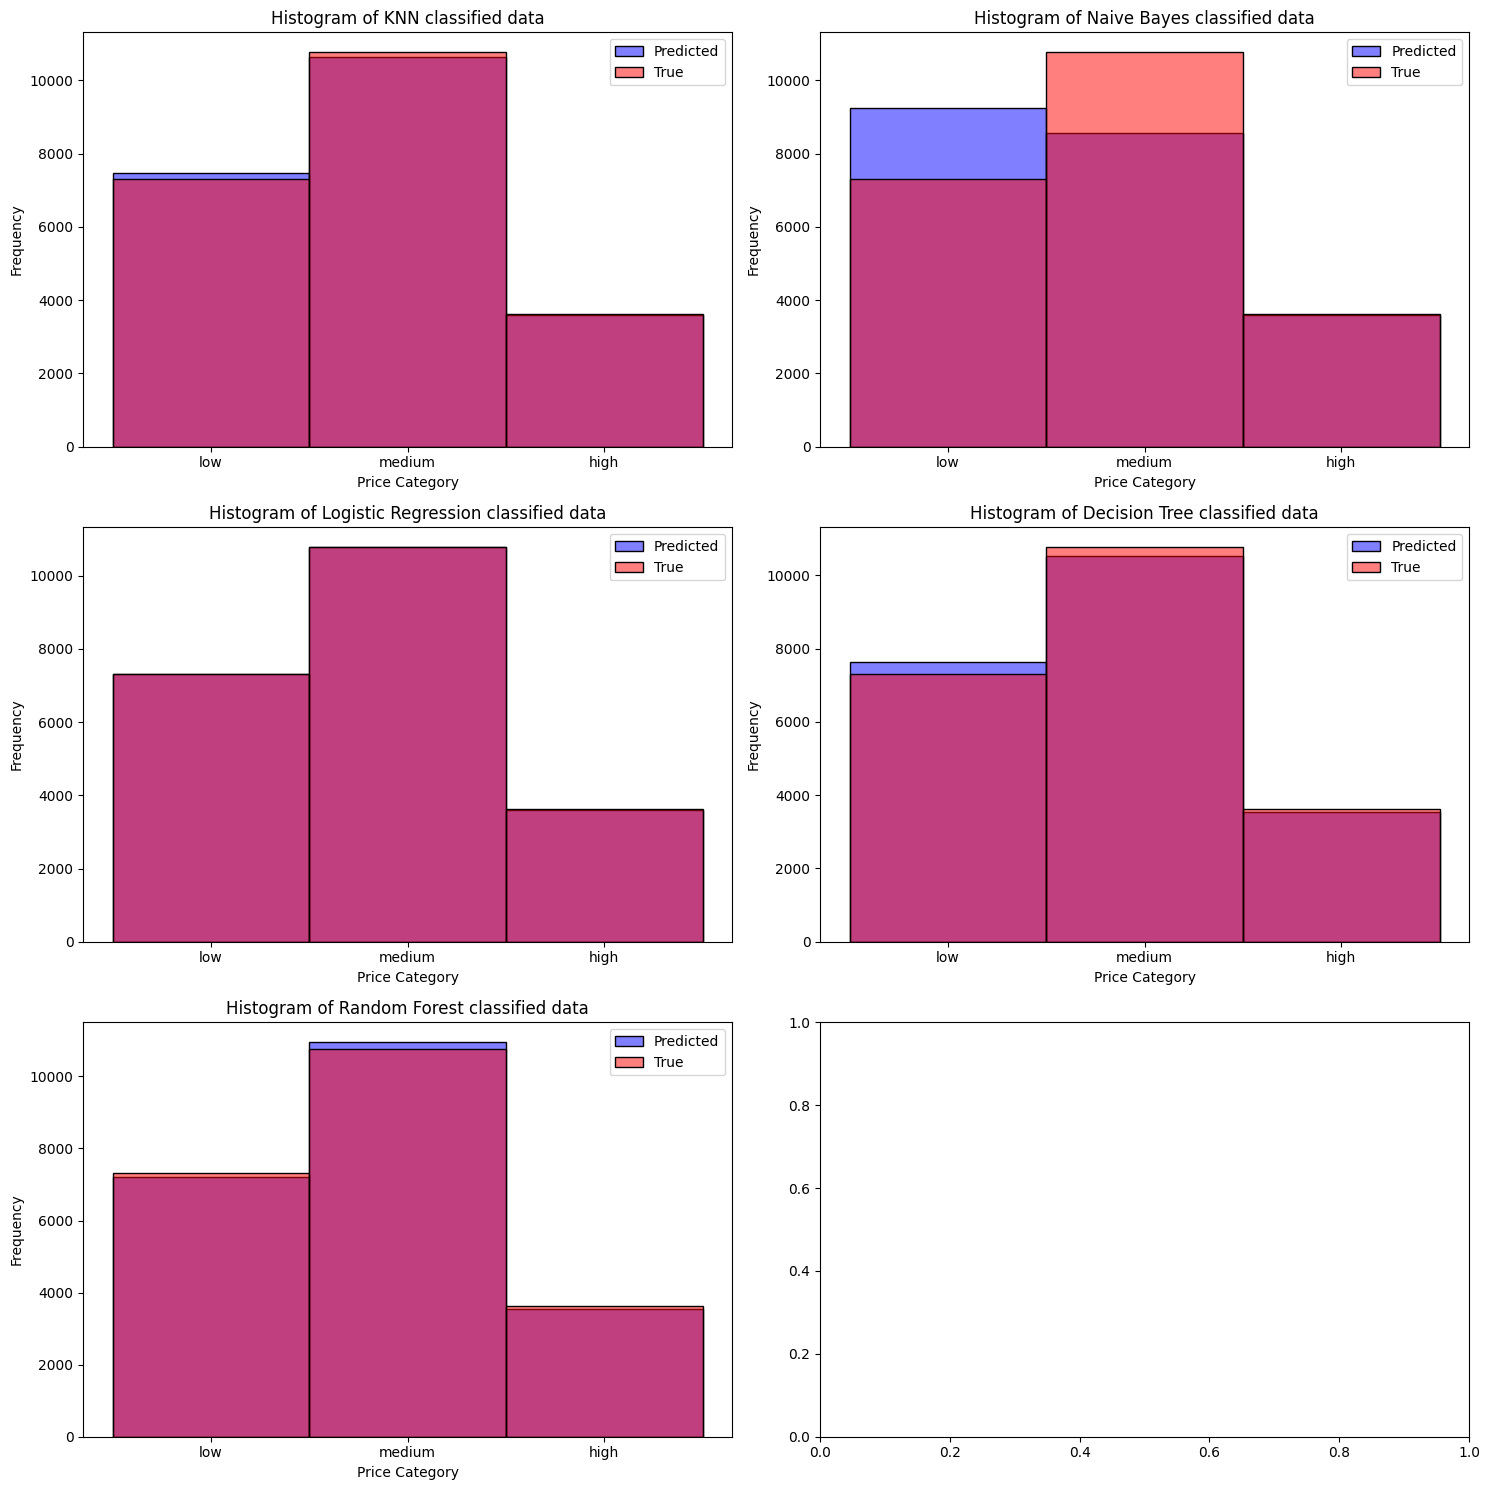

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms_subplots(y_true, results, title):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    axes = axes.flatten()
    classifiers = ['KNN', 'Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest']

    for idx, clf in enumerate(classifiers):
        y_pred = results[idx]['y_pred']
        y_true_labels = pd.Categorical.from_codes(y_true, categories=['low', 'medium', 'high'])
        y_pred_labels = pd.Categorical.from_codes(y_pred, categories=['low', 'medium', 'high'])

        sns.histplot(y_pred_labels, kde=False, color='blue', alpha=0.5, label='Predicted', ax=axes[idx])
        sns.histplot(y_true_labels, kde=False, color='red', alpha=0.5, label='True', ax=axes[idx])
        axes[idx].set_title(f"Histogram of {clf} classified data")
        axes[idx].set_xlabel('Price Category')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

# Assuming the y_test and y_pred results are available from each classifier's evaluation
results = [results_knn, results_nb, results_lr, results_dt, results_rf]

# Plot histograms for each classifier in subplots
plot_histograms_subplots(y_test, results, "Histograms of Classified Data")


